what is a classification problem

1. binary classification - one thing or another (spam or ham)
2. multiclass classification - is this photo of sushi, steak, or pizza? (single label per sample)
3. multilabel classification - what tags should this article have? (multiple label options per sample)

What we're going to cover
1. architecture of nn classification model
2. input shapes and output shapes of a classification model (features and labels)
3. creating custom data to view and fit
4. steps in modelling (creatin a model, compiling a model, fitting a model, eval a model)
5. different classification evaluation methods
6. saving and loading models

How do we determine what the shape of input is in a classification problem?

for image classification the shape is determined by the size of the image
* shape = [batch_size, width, height, channels]
* shape = [None, 224, 224, 3]
or 
* shape = [32, 224, 224, 3] 

In [1]:
#generally we want images that are squares (same pixel height and width)

the output shape will be the number of items we have to choose between for our label.
In the above example output = [3]

#### typical architecture for nn classification problems

In [2]:
'''
model = tf.keras.Sequential([
    tf.keras.input(shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 50)
model.evaluate(X_test, y_test)
'''

"\nmodel = tf.keras.Sequential([\n    tf.keras.input(shape = (224,224,3)),\n    tf.keras.layers.Dense(100, activation = 'relu'),\n    tf.keras.layers.Dense(3, activation = 'softmax')\n])\n\nmodel.compile(loss = tf.keras.losses.CategoricalCrossentropy(),\n              optimizer = tf.keras.optimizers.Adam(),\n              metrics = ['accuracy'])\n\nmodel.fit(X_train, y_train, epochs = 50)\nmodel.evaluate(X_test, y_test)\n"

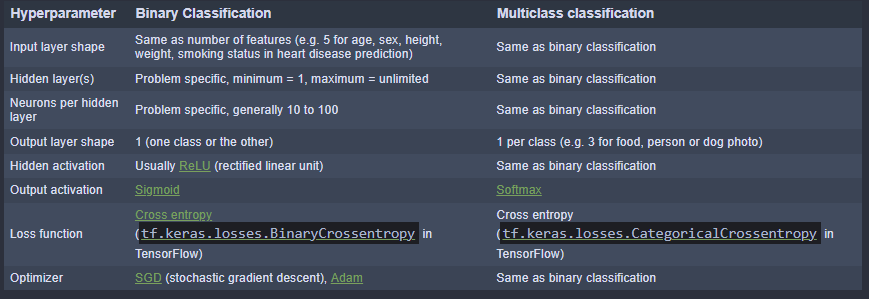

#### creating and viewing classification data to model

In [3]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
#make 1000 examples
n_samples = 1000
#create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [4]:
X, X.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 (1000, 2))

In [5]:
y, y.shape

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 

In [6]:
#as we can see this is a binary classifcation problem

In [7]:
circles = pd.DataFrame({'X0':X[:, 0], 'X1': X[:,1], 'y':y[:]})
circles

,X0,X1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


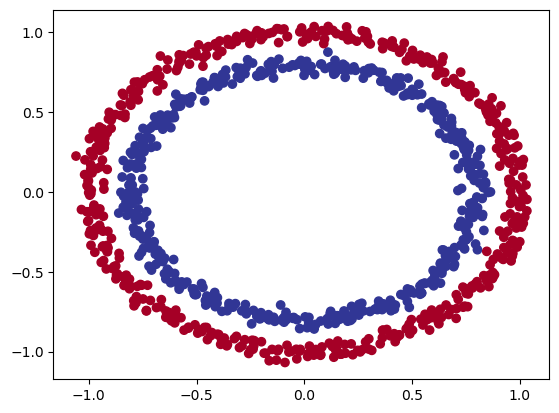

In [8]:
#vis with a plot
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [9]:
#we want our classification problem to draw a circular line between the red and blue dots

#### checking the input and output shapes of our classification data

In [10]:
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

#### building a not very good classification model with tf

In [12]:
X.ndim

2

In [15]:
#set random seed
tf.random.set_seed(42)

#create model
class_model = tf.keras.Sequential([
    #tf.keras.layers.Input(shape = (2,)),  #shape = (batch_size, input_dims)
    tf.keras.layers.Dense(1)
])

class_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                   optimizer = tf.keras.optimizers.SGD(),
                   metrics = ['accuracy'])

class_model.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 0s 505us/step - loss: 5.2118 - accuracy: 0.4660
Epoch 2/5
32/32 [==============================] - 0s 451us/step - loss: 4.8559 - accuracy: 0.4600
Epoch 3/5
32/32 [==============================] - 0s 531us/step - loss: 4.5513 - accuracy: 0.4690
Epoch 4/5
32/32 [==============================] - 0s 644us/step - loss: 3.2784 - accuracy: 0.4870
Epoch 5/5
32/32 [==============================] - 0s 392us/step - loss: 0.7700 - accuracy: 0.4990


In [16]:
#this model returns 49% accuracy which is actually worse than a coin flip.

#### trying to improve our not very good classification model

In [17]:
#train it for longer

In [19]:
tf.random.set_seed(42)
class_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = (2,))
])
class_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                   optimizer = tf.keras.optimizers.SGD(),
                   metrics = ['accuracy'])
class_model.fit(X,y, epochs = 200)

Epoch 1/200
32/32 [==============================] - 0s 546us/step - loss: 2.3324 - accuracy: 0.4590
Epoch 2/200
32/32 [==============================] - 0s 518us/step - loss: 0.7506 - accuracy: 0.4940
Epoch 3/200
32/32 [==============================] - 0s 602us/step - loss: 0.7095 - accuracy: 0.4910
Epoch 4/200
32/32 [==============================] - 0s 507us/step - loss: 0.6988 - accuracy: 0.4950
Epoch 5/200
32/32 [==============================] - 0s 644us/step - loss: 0.6959 - accuracy: 0.4900
Epoch 6/200
32/32 [==============================] - 0s 399us/step - loss: 0.6941 - accuracy: 0.4920
Epoch 7/200
32/32 [==============================] - 0s 480us/step - loss: 0.6943 - accuracy: 0.5050
Epoch 8/200
32/32 [==============================] - 0s 435us/step - loss: 0.6942 - accuracy: 0.4910
Epoch 9/200
32/32 [==============================] - 0s 515us/step - loss: 0.6941 - accuracy: 0.4860
Epoch 10/200
32/32 [==============================] - 0s 435us/step - loss: 0.6938 - accura

32/32 [==============================] - 0s 454us/step - loss: 0.6943 - accuracy: 0.5050
Epoch 82/200
32/32 [==============================] - 0s 672us/step - loss: 0.6941 - accuracy: 0.4690
Epoch 83/200
32/32 [==============================] - 0s 651us/step - loss: 0.6941 - accuracy: 0.4930
Epoch 84/200
32/32 [==============================] - 0s 422us/step - loss: 0.6942 - accuracy: 0.4960
Epoch 85/200
32/32 [==============================] - 0s 678us/step - loss: 0.6939 - accuracy: 0.4930
Epoch 86/200
32/32 [==============================] - 0s 439us/step - loss: 0.6940 - accuracy: 0.4880
Epoch 87/200
32/32 [==============================] - 0s 678us/step - loss: 0.6942 - accuracy: 0.4720
Epoch 88/200
32/32 [==============================] - 0s 443us/step - loss: 0.6944 - accuracy: 0.4470
Epoch 89/200
32/32 [==============================] - 0s 679us/step - loss: 0.6945 - accuracy: 0.4720
Epoch 90/200
32/32 [==============================] - 0s 833us/step - loss: 0.6941 - accuracy: 

32/32 [==============================] - 0s 447us/step - loss: 0.6943 - accuracy: 0.4880
Epoch 161/200
32/32 [==============================] - 0s 448us/step - loss: 0.6942 - accuracy: 0.4770
Epoch 162/200
32/32 [==============================] - 0s 448us/step - loss: 0.6943 - accuracy: 0.4920
Epoch 163/200
32/32 [==============================] - 0s 449us/step - loss: 0.6946 - accuracy: 0.4690
Epoch 164/200
32/32 [==============================] - 0s 448us/step - loss: 0.6943 - accuracy: 0.4610
Epoch 165/200
32/32 [==============================] - 0s 448us/step - loss: 0.6939 - accuracy: 0.4970
Epoch 166/200
32/32 [==============================] - 0s 448us/step - loss: 0.6942 - accuracy: 0.4800
Epoch 167/200
32/32 [==============================] - 0s 463us/step - loss: 0.6948 - accuracy: 0.4930
Epoch 168/200
32/32 [==============================] - 0s 444us/step - loss: 0.6941 - accuracy: 0.4690
Epoch 169/200
32/32 [==============================] - 0s 449us/step - loss: 0.6940 - a

In [20]:
class_model.evaluate(X, y)

32/32 [==============================] - 0s 865us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [21]:
#as we can see there is still only 50% accuracy

In [22]:
#now lets add another dense layer to see what happens

In [24]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = (2,)),
    tf.keras.layers.Dense(1)
])

model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['accuracy'])

model2.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 702us/step - loss: 1.1979 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 433us/step - loss: 0.7217 - accuracy: 0.4920
Epoch 3/100
32/32 [==============================] - 0s 512us/step - loss: 0.7120 - accuracy: 0.4930
Epoch 4/100
32/32 [==============================] - 0s 444us/step - loss: 0.7062 - accuracy: 0.4940
Epoch 5/100
32/32 [==============================] - 0s 510us/step - loss: 0.7032 - accuracy: 0.4940
Epoch 6/100
32/32 [==============================] - 0s 640us/step - loss: 0.7004 - accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 446us/step - loss: 0.6995 - accuracy: 0.5030
Epoch 8/100
32/32 [==============================] - 0s 492us/step - loss: 0.6984 - accuracy: 0.4940
Epoch 9/100
32/32 [==============================] - 0s 624us/step - loss: 0.6974 - accuracy: 0.4990
Epoch 10/100
32/32 [==============================] - 0s 492us/step - loss: 0.6964 - accura

32/32 [==============================] - 0s 499us/step - loss: 0.6939 - accuracy: 0.4800
Epoch 82/100
32/32 [==============================] - 0s 641us/step - loss: 0.6936 - accuracy: 0.4810
Epoch 83/100
32/32 [==============================] - 0s 780us/step - loss: 0.6937 - accuracy: 0.5120
Epoch 84/100
32/32 [==============================] - 0s 460us/step - loss: 0.6939 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 663us/step - loss: 0.6935 - accuracy: 0.4920
Epoch 86/100
32/32 [==============================] - 0s 669us/step - loss: 0.6936 - accuracy: 0.4870
Epoch 87/100
32/32 [==============================] - 0s 601us/step - loss: 0.6938 - accuracy: 0.4820
Epoch 88/100
32/32 [==============================] - 0s 511us/step - loss: 0.6939 - accuracy: 0.4790
Epoch 89/100
32/32 [==============================] - 0s 510us/step - loss: 0.6941 - accuracy: 0.4950
Epoch 90/100
32/32 [==============================] - 0s 523us/step - loss: 0.6938 - accuracy: 

In [25]:
model2.evaluate(X, y)

32/32 [==============================] - 0s 729us/step - loss: 0.6932 - accuracy: 0.5000


[0.6932480931282043, 0.5]

In [65]:
#stil has the same results as above so there was no improvement

In [66]:
#now let's add some activation functions in hopes the model will improve
#creating a model - more layers, more hidden units, activation functions
#compiling - different optimizer
#fitting - train for longer

In [26]:
tf.random.set_seed(42)
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape = (2,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
model3.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 897us/step - loss: 2.7726 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7110 - accuracy: 0.4750
Epoch 3/100
32/32 [==============================] - 0s 863us/step - loss: 0.6995 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 676us/step - loss: 0.6952 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 663us/step - loss: 0.6947 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 897us/step - loss: 0.6947 - accuracy: 0.4400
Epoch 7/100
32/32 [==============================] - 0s 908us/step - loss: 0.6944 - accuracy: 0.5060
Epoch 8/100
32/32 [==============================] - 0s 895us/step - loss: 0.6952 - accuracy: 0.4960
Epoch 9/100
32/32 [==============================] - 0s 897us/step - loss: 0.6961 - accuracy: 0.4800
Epoch 10/100
32/32 [==============================] - 0s 884us/step - loss: 0.6945 - accuracy

32/32 [==============================] - 0s 897us/step - loss: 0.6981 - accuracy: 0.5000
Epoch 82/100
32/32 [==============================] - 0s 893us/step - loss: 0.6970 - accuracy: 0.4830
Epoch 83/100
32/32 [==============================] - 0s 894us/step - loss: 0.7009 - accuracy: 0.4510
Epoch 84/100
32/32 [==============================] - 0s 838us/step - loss: 0.6968 - accuracy: 0.5020
Epoch 85/100
32/32 [==============================] - 0s 897us/step - loss: 0.6970 - accuracy: 0.4650
Epoch 86/100
32/32 [==============================] - 0s 898us/step - loss: 0.7012 - accuracy: 0.4860
Epoch 87/100
32/32 [==============================] - 0s 897us/step - loss: 0.6980 - accuracy: 0.4640
Epoch 88/100
32/32 [==============================] - 0s 894us/step - loss: 0.6984 - accuracy: 0.4610
Epoch 89/100
32/32 [==============================] - 0s 898us/step - loss: 0.6982 - accuracy: 0.4810
Epoch 90/100
32/32 [==============================] - 0s 697us/step - loss: 0.6983 - accuracy: 

In [27]:
model3.evaluate(X,y)

32/32 [==============================] - 0s 704us/step - loss: 0.7004 - accuracy: 0.5090


[0.7004187703132629, 0.5090000033378601]

In [28]:
preds = model3.predict(X)
preds

32/32 [==============================] - 0s 748us/step


array([[0.48108184],
       [0.57080454],
       [0.57585084],
       [0.5837358 ],
       [0.42604333],
       [0.5880456 ],
       [0.567164  ],
       [0.47445786],
       [0.4712977 ],
       [0.5883732 ],
       [0.51752454],
       [0.53326756],
       [0.57555974],
       [0.44498974],
       [0.43654412],
       [0.4506954 ],
       [0.5493018 ],
       [0.45395675],
       [0.557884  ],
       [0.50418323],
       [0.50354815],
       [0.6049702 ],
       [0.44857663],
       [0.4850936 ],
       [0.6005227 ],
       [0.58522195],
       [0.5599688 ],
       [0.45109564],
       [0.44622377],
       [0.44104663],
       [0.47312176],
       [0.59292686],
       [0.5644695 ],
       [0.4508366 ],
       [0.44813454],
       [0.60817003],
       [0.58660984],
       [0.53226   ],
       [0.44736338],
       [0.5087652 ],
       [0.49946377],
       [0.5524312 ],
       [0.513093  ],
       [0.44481856],
       [0.5270764 ],
       [0.5472079 ],
       [0.43470383],
       [0.550

In [70]:
#all the predictions are hovering around .5

In [29]:
preds = model3.predict(X)
circles['preds'] = preds.round().astype('int')

32/32 [==============================] - 0s 759us/step


In [30]:
circles

,X0,X1,y,preds
0,0.754246,0.231481,1,0
1,-0.756159,0.153259,1,1
2,-0.815392,0.173282,1,1
3,-0.393731,0.692883,1,1
4,0.442208,-0.896723,0,0
...,...,...,...,...
995,0.244054,0.944125,0,1
996,-0.978655,-0.272373,0,1
997,-0.136900,-0.810012,1,0
998,0.670362,-0.767502,0,0


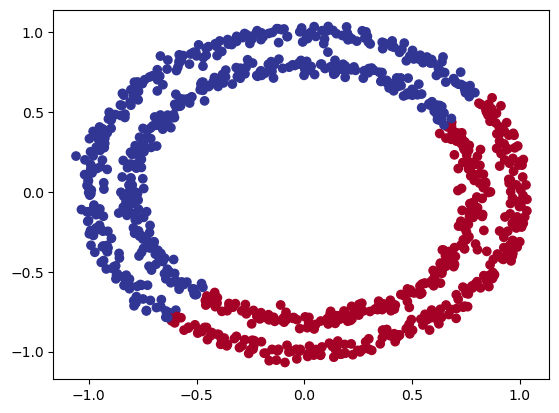

In [31]:
plt.scatter(circles['X0'], circles['X1'], c = circles['preds'], cmap = plt.cm.RdYlBu)

In [32]:
#wow, that is not a good guess

#### creating a function to view our model's not so good predictions

to vis our models predictions, let's create a function `plot_decision_boundary()`. this function will
* take in a trained model, features(X) and labels(y)
* create a meshgrid of the differnt X values
* make predictions across the meshgrid
* plot the predictions, as well as a line between the different zones (where each unique class falls)

In [33]:
import numpy as np

In [34]:


def plot_decision_boundaries(model, X, y):
    """
    plots the decision boundary created by a model prediction on X
    """
    
    #define axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    x_min, x_max, y_min, y_max
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2d arrays together
    
    #make predictions
    y_pred = model.predict(x_in)
    
    #check for multiclass problem
    if len(y_pred[0]) > 1:
        print('doing multiclass classification')
        #we need to reshape our preds
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print('binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    #plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 540us/step
binary classification


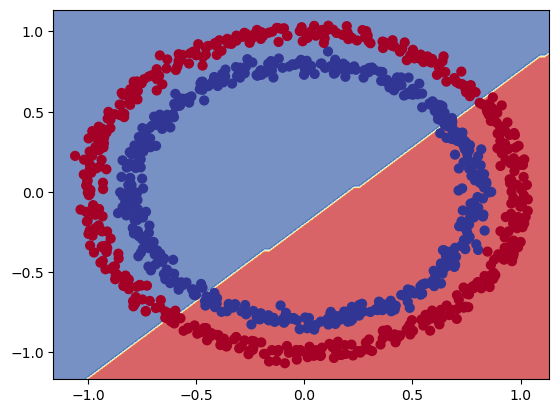

In [35]:
plot_decision_boundaries(model3, X, y)

In [36]:
#looks like the model is trying to draw a straight line even though our data is circular.

#### make our poor classification model work for a regression dataset

In [37]:
#this seems like a dumb idea.
'''
tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression = [:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression = [:150]
y_reg_test = y_regression[150:]


model3.fit(X_reg_train, y_reg_train)

this won't work because the model is compiled with binarycrossentropy classification problem

'''

"\ntf.random.set_seed(42)\n\nX_regression = tf.range(0,1000,5)\ny_regression = tf.range(100, 1100, 5)\n\nX_reg_train = X_regression = [:150]\nX_reg_test = X_regression[150:]\ny_reg_train = y_regression = [:150]\ny_reg_test = y_regression[150:]\n\n\nmodel3.fit(X_reg_train, y_reg_train)\n\nthis won't work because the model is compiled with binarycrossentropy classification problem\n\n"

#### Non-linearity

In [38]:
#lets play around with some addition params to see if we can get it to fit on the circular data

tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

model4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 476us/step - loss: 4.4376 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 470us/step - loss: 4.3388 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 431us/step - loss: 4.2154 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 450us/step - loss: 4.0475 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 670us/step - loss: 3.9387 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 450us/step - loss: 3.7972 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 672us/step - loss: 3.6203 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 449us/step - loss: 3.4455 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 452us/step - loss: 3.4160 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 448us/step - loss: 3.3782 - accura

32/32 [==============================] - 0s 579us/step - loss: 0.8212 - accuracy: 0.5000
Epoch 82/100
32/32 [==============================] - 0s 759us/step - loss: 0.8183 - accuracy: 0.5000
Epoch 83/100
32/32 [==============================] - 0s 296us/step - loss: 0.8155 - accuracy: 0.5000
Epoch 84/100
32/32 [==============================] - 0s 674us/step - loss: 0.8128 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 659us/step - loss: 0.8100 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 278us/step - loss: 0.8073 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 844us/step - loss: 0.8047 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 541us/step - loss: 0.8021 - accuracy: 0.5000
Epoch 89/100
32/32 [==============================] - 0s 509us/step - loss: 0.7997 - accuracy: 0.5000
Epoch 90/100
32/32 [==============================] - 0s 514us/step - loss: 0.7971 - accuracy: 

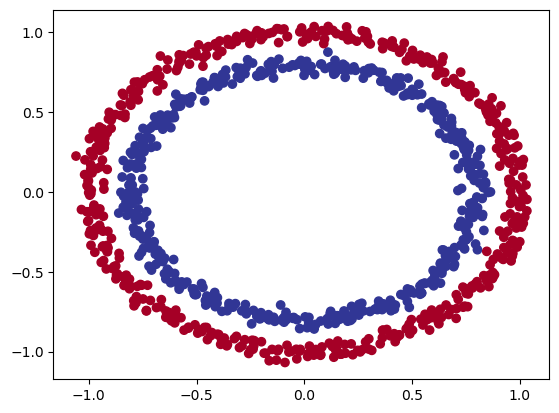

In [39]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

313/313 [==============================] - 0s 360us/step
binary classification


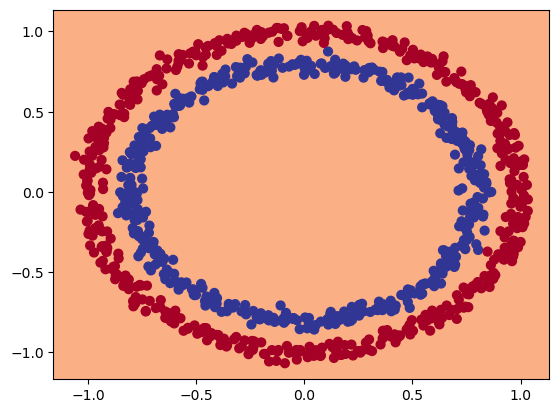

In [40]:
#check the decision boundary for model4
plot_decision_boundaries(model = model4, X = X, y = y)

In [41]:
#so the linear activation fn didnt work work so lets try relu
tf.random.set_seed(42)
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'relu')
])

model5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

history = model5.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 671us/step - loss: 4.4214 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 896us/step - loss: 4.3771 - accuracy: 0.4670
Epoch 3/100
32/32 [==============================] - 0s 671us/step - loss: 4.3400 - accuracy: 0.4680
Epoch 4/100
32/32 [==============================] - 0s 672us/step - loss: 4.3293 - accuracy: 0.4660
Epoch 5/100
32/32 [==============================] - 0s 896us/step - loss: 4.3107 - accuracy: 0.4650
Epoch 6/100
32/32 [==============================] - 0s 672us/step - loss: 4.2605 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 671us/step - loss: 4.1599 - accuracy: 0.4640
Epoch 8/100
32/32 [==============================] - 0s 672us/step - loss: 4.0663 - accuracy: 0.4640
Epoch 9/100
32/32 [==============================] - 0s 776us/step - loss: 4.0058 - accuracy: 0.4680
Epoch 10/100
32/32 [==============================] - 0s 800us/step - loss: 3.9559 - accura

32/32 [==============================] - 0s 667us/step - loss: 0.7441 - accuracy: 0.4650
Epoch 82/100
32/32 [==============================] - 0s 652us/step - loss: 0.7422 - accuracy: 0.4640
Epoch 83/100
32/32 [==============================] - 0s 923us/step - loss: 0.7404 - accuracy: 0.4650
Epoch 84/100
32/32 [==============================] - 0s 867us/step - loss: 0.7386 - accuracy: 0.4650
Epoch 85/100
32/32 [==============================] - 0s 664us/step - loss: 0.7369 - accuracy: 0.4640
Epoch 86/100
32/32 [==============================] - 0s 685us/step - loss: 0.7353 - accuracy: 0.4660
Epoch 87/100
32/32 [==============================] - 0s 675us/step - loss: 0.7336 - accuracy: 0.4660
Epoch 88/100
32/32 [==============================] - 0s 686us/step - loss: 0.7321 - accuracy: 0.4650
Epoch 89/100
32/32 [==============================] - 0s 896us/step - loss: 0.7307 - accuracy: 0.4660
Epoch 90/100
32/32 [==============================] - 0s 670us/step - loss: 0.7292 - accuracy: 

313/313 [==============================] - 0s 391us/step
binary classification


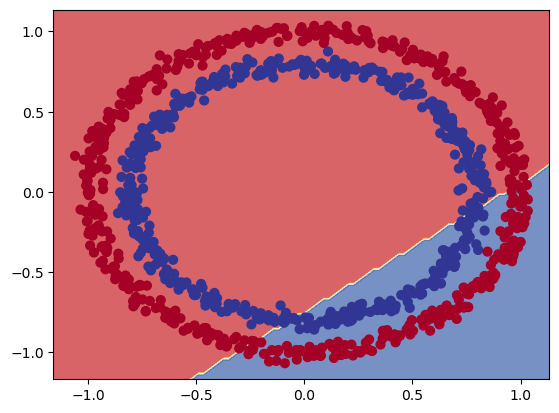

In [42]:
plot_decision_boundaries(model = model5, X = X, y = y)

In [44]:
# now lets increase hidden layers, neurons, and set activation to a non-linear function
tf.random.set_seed(42)

model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu', input_shape = (2,)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu')
])

model6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
history = model6.fit(X, y, epochs = 250)

Epoch 1/250
32/32 [==============================] - 0s 897us/step - loss: 1.4124 - accuracy: 0.4910
Epoch 2/250
32/32 [==============================] - 0s 897us/step - loss: 1.1037 - accuracy: 0.4480
Epoch 3/250
32/32 [==============================] - 0s 897us/step - loss: 0.9687 - accuracy: 0.4650
Epoch 4/250
32/32 [==============================] - 0s 896us/step - loss: 0.8889 - accuracy: 0.4740
Epoch 5/250
32/32 [==============================] - 0s 895us/step - loss: 0.8465 - accuracy: 0.4750
Epoch 6/250
32/32 [==============================] - 0s 896us/step - loss: 0.8167 - accuracy: 0.4760
Epoch 7/250
32/32 [==============================] - 0s 896us/step - loss: 0.7950 - accuracy: 0.4800
Epoch 8/250
32/32 [==============================] - 0s 913us/step - loss: 0.7789 - accuracy: 0.4800
Epoch 9/250
32/32 [==============================] - 0s 656us/step - loss: 0.7660 - accuracy: 0.4790
Epoch 10/250
32/32 [==============================] - 0s 669us/step - loss: 0.7559 - accura

32/32 [==============================] - 0s 672us/step - loss: 0.1598 - accuracy: 0.9680
Epoch 82/250
32/32 [==============================] - 0s 672us/step - loss: 0.1558 - accuracy: 0.9640
Epoch 83/250
32/32 [==============================] - 0s 672us/step - loss: 0.1502 - accuracy: 0.9710
Epoch 84/250
32/32 [==============================] - 0s 673us/step - loss: 0.1484 - accuracy: 0.9740
Epoch 85/250
32/32 [==============================] - 0s 680us/step - loss: 0.1442 - accuracy: 0.9760
Epoch 86/250
32/32 [==============================] - 0s 720us/step - loss: 0.1423 - accuracy: 0.9780
Epoch 87/250
32/32 [==============================] - 0s 702us/step - loss: 0.1372 - accuracy: 0.9790
Epoch 88/250
32/32 [==============================] - 0s 831us/step - loss: 0.1347 - accuracy: 0.9790
Epoch 89/250
32/32 [==============================] - 0s 883us/step - loss: 0.1326 - accuracy: 0.9760
Epoch 90/250
32/32 [==============================] - 0s 895us/step - loss: 0.1300 - accuracy: 

32/32 [==============================] - 0s 895us/step - loss: 0.0642 - accuracy: 0.9840
Epoch 161/250
32/32 [==============================] - 0s 722us/step - loss: 0.0634 - accuracy: 0.9890
Epoch 162/250
32/32 [==============================] - 0s 687us/step - loss: 0.0638 - accuracy: 0.9900
Epoch 163/250
32/32 [==============================] - 0s 671us/step - loss: 0.0659 - accuracy: 0.9810
Epoch 164/250
32/32 [==============================] - 0s 847us/step - loss: 0.0629 - accuracy: 0.9870
Epoch 165/250
32/32 [==============================] - 0s 894us/step - loss: 0.0612 - accuracy: 0.9870
Epoch 166/250
32/32 [==============================] - 0s 857us/step - loss: 0.0631 - accuracy: 0.9880
Epoch 167/250
32/32 [==============================] - 0s 889us/step - loss: 0.0629 - accuracy: 0.9880
Epoch 168/250
32/32 [==============================] - 0s 896us/step - loss: 0.0610 - accuracy: 0.9860
Epoch 169/250
32/32 [==============================] - 0s 896us/step - loss: 0.0598 - a

32/32 [==============================] - 0s 900us/step - loss: 0.0651 - accuracy: 0.9830
Epoch 240/250
32/32 [==============================] - 0s 728us/step - loss: 0.0609 - accuracy: 0.9820
Epoch 241/250
32/32 [==============================] - 0s 715us/step - loss: 0.0595 - accuracy: 0.9850
Epoch 242/250
32/32 [==============================] - 0s 625us/step - loss: 0.0611 - accuracy: 0.9840
Epoch 243/250
32/32 [==============================] - 0s 857us/step - loss: 0.0615 - accuracy: 0.9880
Epoch 244/250
32/32 [==============================] - 0s 897us/step - loss: 0.0592 - accuracy: 0.9880
Epoch 245/250
32/32 [==============================] - 0s 892us/step - loss: 0.0591 - accuracy: 0.9890
Epoch 246/250
32/32 [==============================] - 0s 897us/step - loss: 0.0588 - accuracy: 0.9860
Epoch 247/250
32/32 [==============================] - 0s 855us/step - loss: 0.0582 - accuracy: 0.9850
Epoch 248/250
32/32 [==============================] - 0s 720us/step - loss: 0.0588 - a

313/313 [==============================] - 0s 557us/step
binary classification


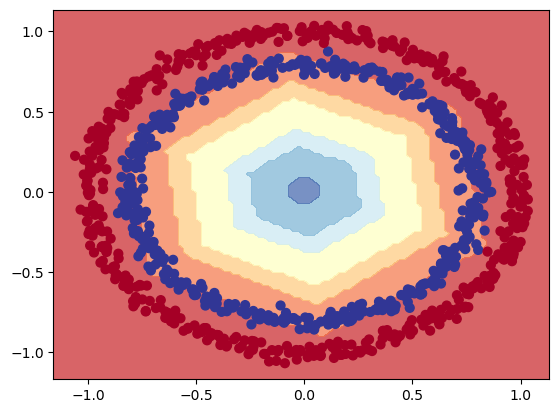

In [45]:
plot_decision_boundaries(model6, X, y)

In [46]:
#the output layer for binary classification should have a sigmoid activation function
tf.random.set_seed(42)
model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu', input_shape = (2,)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

history = model7.fit(X, y, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 674us/step - loss: 0.6998 - accuracy: 0.4980
Epoch 2/250
32/32 [==============================] - 0s 690us/step - loss: 0.6982 - accuracy: 0.4960
Epoch 3/250
32/32 [==============================] - 0s 880us/step - loss: 0.6970 - accuracy: 0.4890
Epoch 4/250
32/32 [==============================] - 0s 896us/step - loss: 0.6960 - accuracy: 0.4920
Epoch 5/250
32/32 [==============================] - 0s 896us/step - loss: 0.6953 - accuracy: 0.4920
Epoch 6/250
32/32 [==============================] - 0s 912us/step - loss: 0.6948 - accuracy: 0.4830
Epoch 7/250
32/32 [==============================] - 0s 689us/step - loss: 0.6941 - accuracy: 0.4880
Epoch 8/250
32/32 [==============================] - 0s 672us/step - loss: 0.6936 - accuracy: 0.4900
Epoch 9/250
32/32 [==============================] - 0s 671us/step - loss: 0.6930 - accuracy: 0.4940
Epoch 10/250
32/32 [==============================] - 0s 671us/step - loss: 0.6926 - accura

32/32 [==============================] - 0s 896us/step - loss: 0.5581 - accuracy: 0.7780
Epoch 82/250
32/32 [==============================] - 0s 672us/step - loss: 0.5519 - accuracy: 0.7530
Epoch 83/250
32/32 [==============================] - 0s 672us/step - loss: 0.5447 - accuracy: 0.7590
Epoch 84/250
32/32 [==============================] - 0s 687us/step - loss: 0.5339 - accuracy: 0.7810
Epoch 85/250
32/32 [==============================] - 0s 670us/step - loss: 0.5253 - accuracy: 0.7770
Epoch 86/250
32/32 [==============================] - 0s 689us/step - loss: 0.5196 - accuracy: 0.7820
Epoch 87/250
32/32 [==============================] - 0s 897us/step - loss: 0.5117 - accuracy: 0.7890
Epoch 88/250
32/32 [==============================] - 0s 898us/step - loss: 0.5049 - accuracy: 0.7950
Epoch 89/250
32/32 [==============================] - 0s 894us/step - loss: 0.4978 - accuracy: 0.8070
Epoch 90/250
32/32 [==============================] - 0s 879us/step - loss: 0.4918 - accuracy: 

32/32 [==============================] - 0s 672us/step - loss: 0.1847 - accuracy: 0.9730
Epoch 161/250
32/32 [==============================] - 0s 896us/step - loss: 0.1818 - accuracy: 0.9790
Epoch 162/250
32/32 [==============================] - 0s 896us/step - loss: 0.1792 - accuracy: 0.9810
Epoch 163/250
32/32 [==============================] - 0s 896us/step - loss: 0.1770 - accuracy: 0.9780
Epoch 164/250
32/32 [==============================] - 0s 896us/step - loss: 0.1749 - accuracy: 0.9820
Epoch 165/250
32/32 [==============================] - 0s 896us/step - loss: 0.1735 - accuracy: 0.9800
Epoch 166/250
32/32 [==============================] - 0s 896us/step - loss: 0.1721 - accuracy: 0.9790
Epoch 167/250
32/32 [==============================] - 0s 672us/step - loss: 0.1707 - accuracy: 0.9780
Epoch 168/250
32/32 [==============================] - 0s 671us/step - loss: 0.1684 - accuracy: 0.9790
Epoch 169/250
32/32 [==============================] - 0s 669us/step - loss: 0.1673 - a

32/32 [==============================] - 0s 896us/step - loss: 0.0906 - accuracy: 0.9840
Epoch 240/250
32/32 [==============================] - 0s 896us/step - loss: 0.0902 - accuracy: 0.9860
Epoch 241/250
32/32 [==============================] - 0s 672us/step - loss: 0.0893 - accuracy: 0.9810
Epoch 242/250
32/32 [==============================] - 0s 672us/step - loss: 0.0897 - accuracy: 0.9830
Epoch 243/250
32/32 [==============================] - 0s 672us/step - loss: 0.0887 - accuracy: 0.9830
Epoch 244/250
32/32 [==============================] - 0s 896us/step - loss: 0.0879 - accuracy: 0.9840
Epoch 245/250
32/32 [==============================] - 0s 896us/step - loss: 0.0878 - accuracy: 0.9840
Epoch 246/250
32/32 [==============================] - 0s 897us/step - loss: 0.0868 - accuracy: 0.9840
Epoch 247/250
32/32 [==============================] - 0s 895us/step - loss: 0.0862 - accuracy: 0.9840
Epoch 248/250
32/32 [==============================] - 0s 896us/step - loss: 0.0854 - a

313/313 [==============================] - 0s 562us/step
binary classification


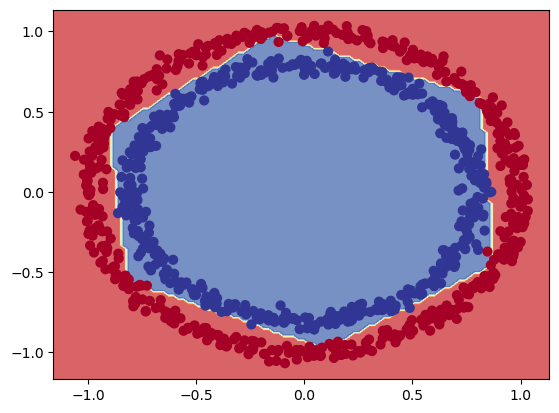

In [47]:
plot_decision_boundaries(model7, X, y)

the combination of linear and non-linear functions is one of the key fundamentals of neural networks. (basically allows us to draw any pattern) (example: when trying to determine what food is in an image there are an infinite amount of different patterns that could correspond to different foods)

#### replicating non-linear activation fns from scratch

In [48]:
#create a toy tensor (similar to the data we passed into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

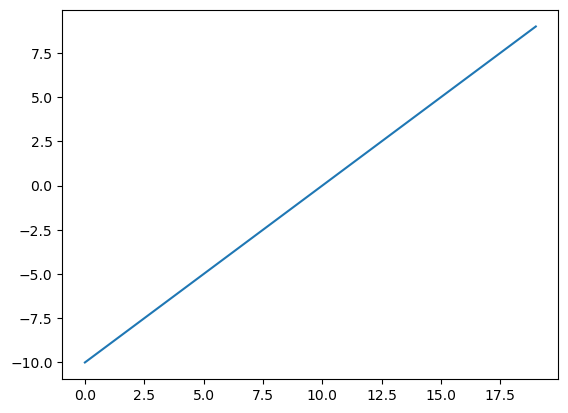

In [49]:
#vis toy tensor
plt.plot(A)
#linear 

In [50]:
#lets start by replicating sigmoid - sigmoid(x) = 1/(1+exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [51]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

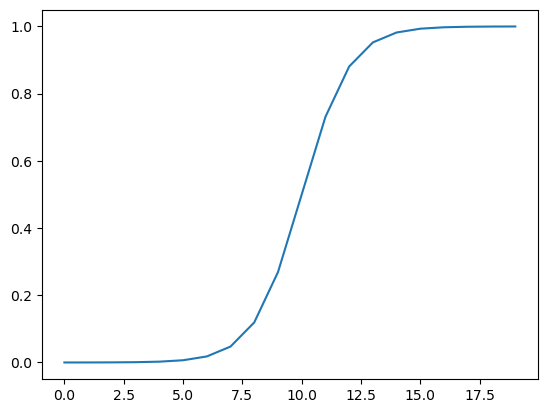

In [52]:
#plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [53]:
#we can also see how relu activation fn affects our straight line
def relu(x):
    return tf.maximum(0, x)

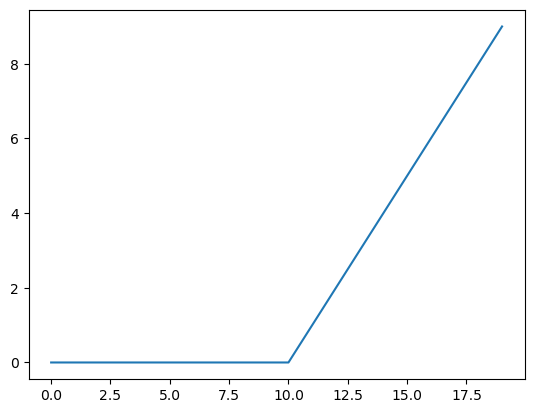

In [54]:
plt.plot(relu(A))

now we've got the curvey line and the bendy line we can draw a wide variety of patterns in the data to best fit a line

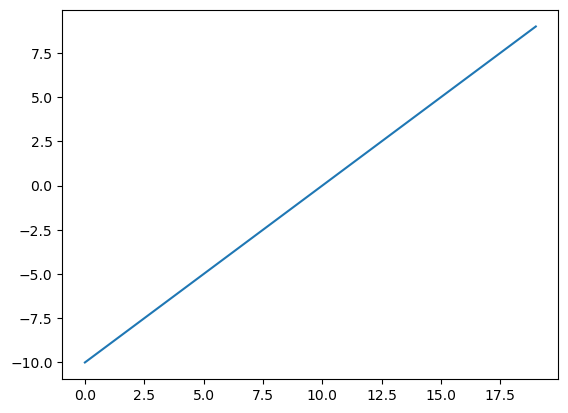

In [55]:
#we can also do it for the linear function
def linear(x):
    return x

plt.plot(linear(A))

#### Evaluating and improving our classification

In [56]:
#instead of training and testing on the same dataset we need to split them using the train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [60]:
#lets recreate a model to fit onj the training data
tf.random.set_seed(42)

model8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
               #chage how much the model should improve the weights on each epoch
              metrics = ['accuracy'])

history = model8.fit(X_train, y_train, epochs = 35)

Epoch 1/35
25/25 [==============================] - 0s 949us/step - loss: 0.6913 - accuracy: 0.5000
Epoch 2/35
25/25 [==============================] - 0s 745us/step - loss: 0.6881 - accuracy: 0.5288
Epoch 3/35
25/25 [==============================] - 0s 940us/step - loss: 0.6835 - accuracy: 0.5550
Epoch 4/35
25/25 [==============================] - 0s 897us/step - loss: 0.6789 - accuracy: 0.5938
Epoch 5/35
25/25 [==============================] - 0s 637us/step - loss: 0.6696 - accuracy: 0.5362
Epoch 6/35
25/25 [==============================] - 0s 635us/step - loss: 0.6542 - accuracy: 0.6037
Epoch 7/35
25/25 [==============================] - 0s 635us/step - loss: 0.6350 - accuracy: 0.6275
Epoch 8/35
25/25 [==============================] - 0s 867us/step - loss: 0.6104 - accuracy: 0.6662
Epoch 9/35
25/25 [==============================] - 0s 868us/step - loss: 0.5790 - accuracy: 0.7188
Epoch 10/35
25/25 [==============================] - 0s 868us/step - loss: 0.5507 - accuracy: 0.7513

In [61]:
model8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0846 - accuracy: 0.9900


[0.08463059365749359, 0.9900000095367432]

313/313 [==============================] - 0s 576us/step
binary classification
313/313 [==============================] - 0s 579us/step
binary classification


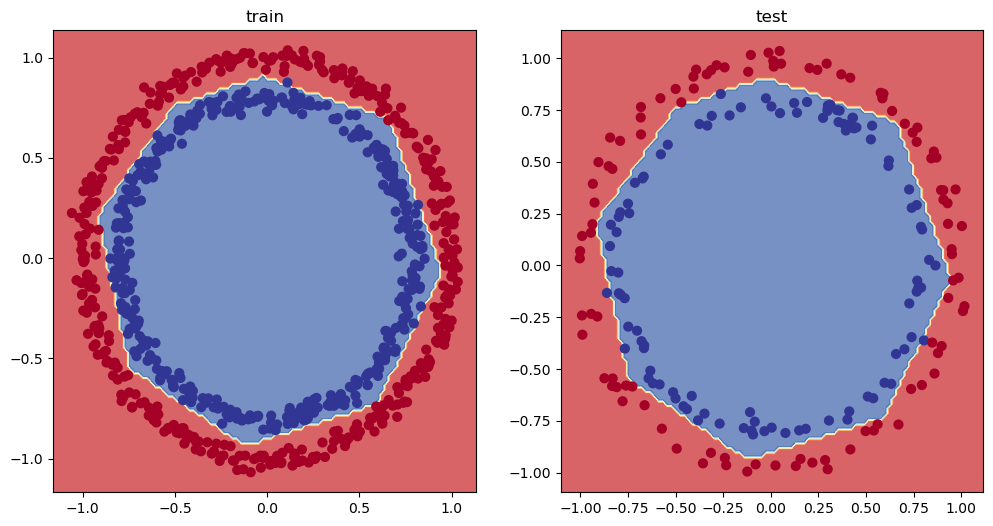

In [62]:
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundaries(model8, X_train, y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundaries(model8, X_test, y_test)

In [63]:
#both decision boundaries look good for splitting the classes into the correct classification

In [64]:
#increasing the lreaning rate may not always provide the best results.
#there is a way of optimizing the learning rate that we'll discuss shortly

####  history

In [65]:
#we can use the history object assigned during the model fit to 
#get the loss and accuracy curves
history

In [66]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [67]:
history.history['loss']

[0.691343367099762,
 0.6880819201469421,
 0.6835157871246338,
 0.6788585186004639,
 0.6696286797523499,
 0.6541795134544373,
 0.6350404620170593,
 0.6103832721710205,
 0.5790223479270935,
 0.5507316589355469,
 0.5108048319816589,
 0.485675573348999,
 0.4701279103755951,
 0.45194852352142334,
 0.43288737535476685,
 0.4193709194660187,
 0.40907180309295654,
 0.3931443691253662,
 0.3860268294811249,
 0.3763032853603363,
 0.37268856167793274,
 0.3627772033214569,
 0.35393741726875305,
 0.346792608499527,
 0.34698158502578735,
 0.32543182373046875,
 0.3113926947116852,
 0.2937816381454468,
 0.2677842676639557,
 0.16646060347557068,
 0.12091562151908875,
 0.10311733931303024,
 0.08725033700466156,
 0.07534725964069366,
 0.06757459789514542]

In [68]:
history.history['accuracy']

[0.5,
 0.5287500023841858,
 0.5550000071525574,
 0.59375,
 0.5362499952316284,
 0.6037499904632568,
 0.6274999976158142,
 0.6662499904632568,
 0.71875,
 0.7512500286102295,
 0.7787500023841858,
 0.800000011920929,
 0.8050000071525574,
 0.8087499737739563,
 0.8387500047683716,
 0.8362500071525574,
 0.8500000238418579,
 0.8500000238418579,
 0.8512499928474426,
 0.8600000143051147,
 0.8550000190734863,
 0.8537499904632568,
 0.8612499833106995,
 0.8700000047683716,
 0.8600000143051147,
 0.8787500262260437,
 0.8862500190734863,
 0.8999999761581421,
 0.9087499976158142,
 0.9775000214576721,
 0.9925000071525574,
 0.9962499737739563,
 0.9950000047683716,
 0.9950000047683716,
 0.9950000047683716]

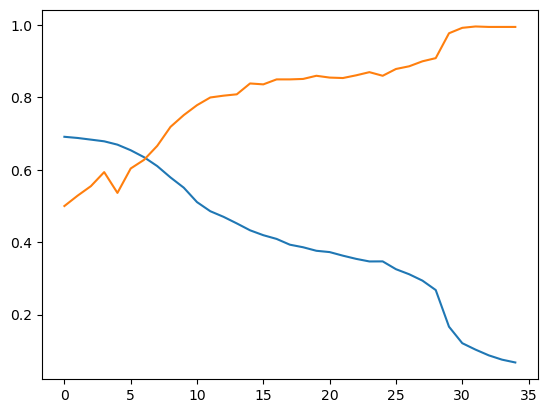

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

the loss function should decrease over time and the accuracy should increase over time. this means the model is improving. 

In [70]:
#can also turn the history object into a df
history_df = pd.DataFrame(history.history, columns = ['loss', 'accuracy'])
history_df

,loss,accuracy
0,0.691343,0.50000
1,0.688082,0.52875
2,0.683516,0.55500
3,0.678859,0.59375
4,0.669629,0.53625
5,0.654180,0.60375
6,0.635040,0.62750
7,0.610383,0.66625
8,0.579022,0.71875
9,0.550732,0.75125


#### using callbacks to find the models ideal learning rate

In [71]:
#so far we've only used a hard coded learning rate value
#to find the ideal lr we're going to use the following steps
#a learning rate callback
#another mmodel
#a modified loss curves plot

In [72]:
#set random seed
tf.random.set_seed(42)
#create the model
model9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
#compile the model
model9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
#define the callbacks
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
#fit the model
history9 = model9.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 581us/step - loss: 0.7011 - accuracy: 0.5150 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 868us/step - loss: 0.7008 - accuracy: 0.5175 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 869us/step - loss: 0.7005 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 867us/step - loss: 0.7002 - accuracy: 0.5125 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 932us/step - loss: 0.6999 - accuracy: 0.5100 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 722us/step - loss: 0.6994 - accuracy: 0.5088 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 867us/step - loss: 0.6990 - accuracy: 0.5138 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 870us/step - loss: 0.6986 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

25/25 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.9675 - lr: 0.3162
Epoch 72/100
25/25 [==============================] - 0s 784us/step - loss: 0.1861 - accuracy: 0.9312 - lr: 0.3548
Epoch 73/100
25/25 [==============================] - 0s 746us/step - loss: 0.2123 - accuracy: 0.9150 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 746us/step - loss: 0.3060 - accuracy: 0.8800 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 785us/step - loss: 0.1175 - accuracy: 0.9550 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 786us/step - loss: 0.1750 - accuracy: 0.9362 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 744us/step - loss: 0.4932 - accuracy: 0.8150 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 785us/step - loss: 0.5047 - accuracy: 0.7312 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 783us/step - loss: 0.5220 - accuracy: 

<Axes: xlabel='epochs'>

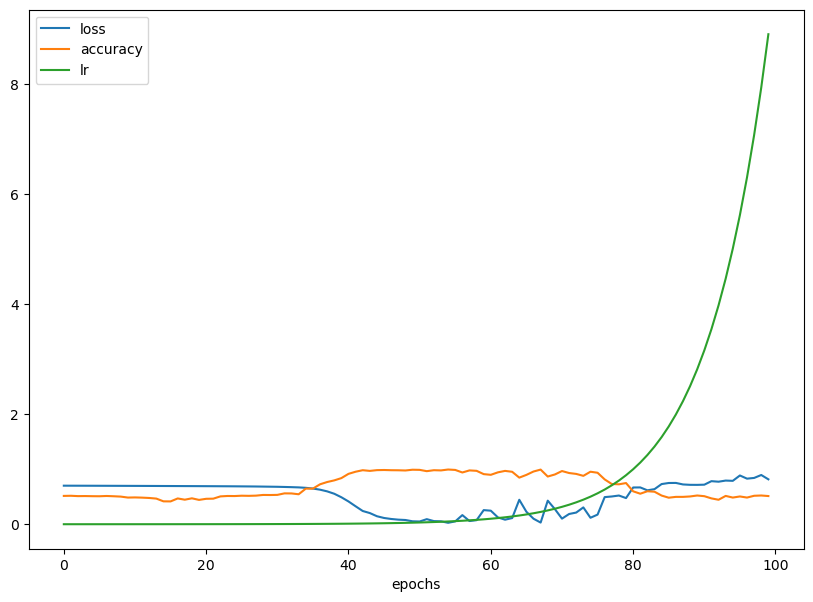

In [73]:
pd.DataFrame(history9.history).plot(figsize = (10,7), xlabel = 'epochs')
# we can see that the learning rate actually increases as epoch increases, which isn't what we want at all.

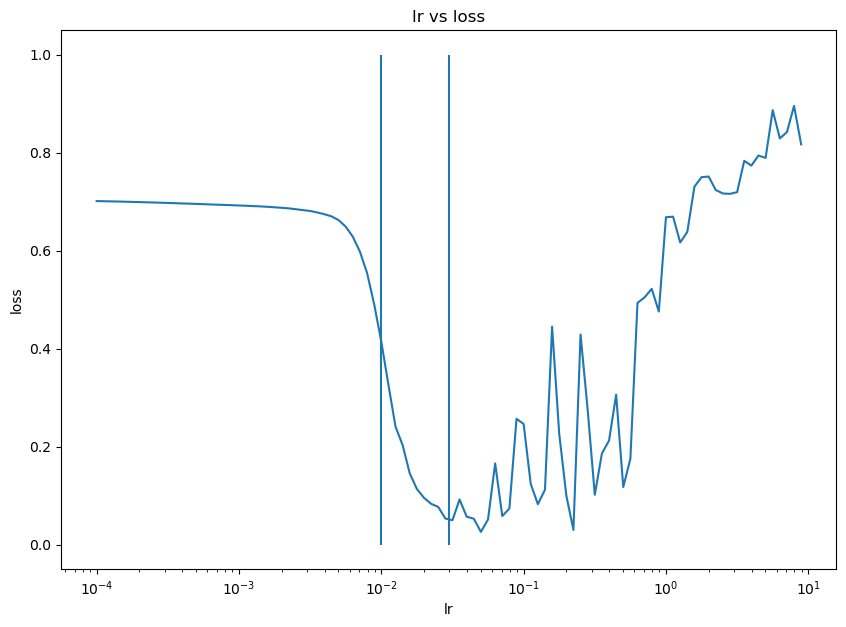

In [74]:
#now lets find the ideal lr value
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history9.history['loss'])
plt.xlabel('lr')
plt.ylabel('loss')
plt.title('lr vs loss')
plt.vlines(x = 0.01, ymin = 0, ymax = 1)
plt.vlines(x = 0.03, ymin = 0, ymax = 1)

In [75]:
# we want the value where the loss is decreasing the value the fastest before it levels off.
#in this case the value betwen 0.01 and .03

In [76]:
#other typical learning rate values inaclude 1,0.1, 0.1, 0.001, 0.0001

In [77]:
#we previously used 0.01 but since the loss is still dropping we should choose a value between 0.1 and .01
#lets say 0.02

In [78]:
tf.random.set_seed(42)

model10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model10.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                metrics = ['accuracy'])

history10 = model10.fit(X_train, y_train, epochs = 20)

Epoch 1/20
25/25 [==============================] - 0s 903us/step - loss: 0.6938 - accuracy: 0.4925
Epoch 2/20
25/25 [==============================] - 0s 838us/step - loss: 0.6886 - accuracy: 0.5050
Epoch 3/20
25/25 [==============================] - 0s 583us/step - loss: 0.6749 - accuracy: 0.5763
Epoch 4/20
25/25 [==============================] - 0s 582us/step - loss: 0.6578 - accuracy: 0.5962
Epoch 5/20
25/25 [==============================] - 0s 687us/step - loss: 0.6534 - accuracy: 0.5913
Epoch 6/20
25/25 [==============================] - 0s 623us/step - loss: 0.6026 - accuracy: 0.6850
Epoch 7/20
25/25 [==============================] - 0s 787us/step - loss: 0.5335 - accuracy: 0.7862
Epoch 8/20
25/25 [==============================] - 0s 535us/step - loss: 0.4673 - accuracy: 0.8238
Epoch 9/20
25/25 [==============================] - 0s 879us/step - loss: 0.4310 - accuracy: 0.8400
Epoch 10/20
25/25 [==============================] - 0s 875us/step - loss: 0.4039 - accuracy: 0.8413

In [79]:
#before the model took 53 epochs to get 98% accuracy where here it only took 20 epochs.

In [80]:
model10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 0s/step - loss: 0.0758 - accuracy: 0.9850


[0.07576599717140198, 0.9850000143051147]

313/313 [==============================] - 0s 551us/step
binary classification
313/313 [==============================] - 0s 563us/step
binary classification


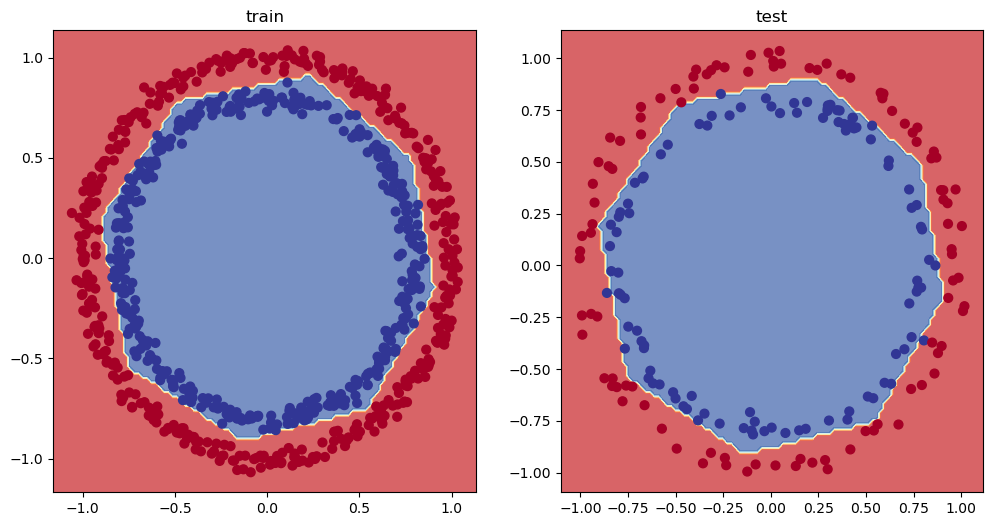

In [81]:
#plot the decision boundaires for test and train for model10
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundaries(model10, X_train, y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundaries(model10, X_test, y_test)

#### More classification evaulation methods

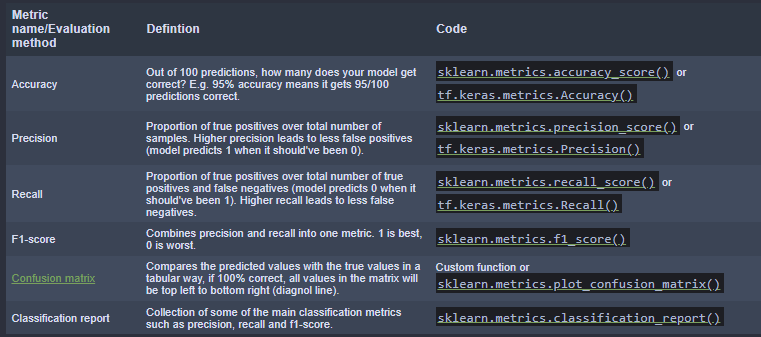

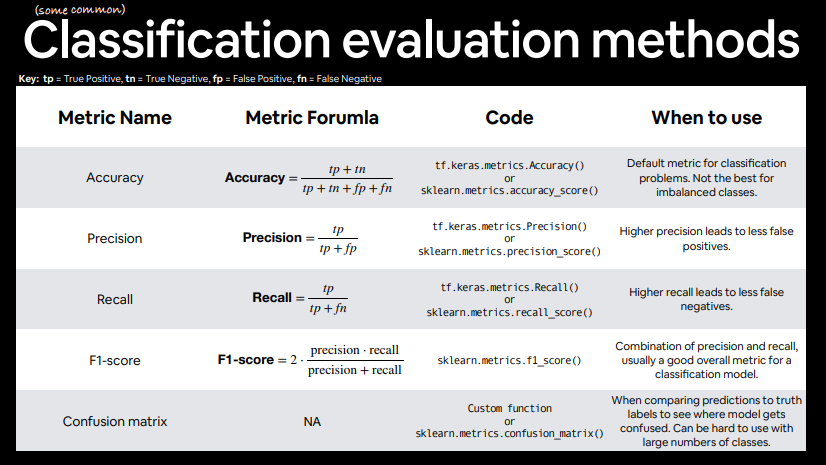

In [82]:
preds10 = tf.round(model10.predict(X_test))
#the sigmoid returns a probability so we need to convert it to an int

7/7 [==============================] - 0s 656us/step


In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [84]:
y_test, preds10

(array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 1], dtype=int64),
 <tf.Tensor: shape=(200, 1), dtype=float32, numpy=
 array([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
  

In [85]:
accuracy_score(y_test, preds10)

0.985

In [86]:
f1_score(y_test, preds10)
#harmonic mean of precision and recall
#2*(precision*recall)/(precision+recall)

0.9847715736040609

In [87]:
recall_score(y_test, preds10)
#tp/(tp+fn)

0.97

In [88]:
precision_score(y_test, preds10)
#tp/(tp+fp)

1.0

In [89]:
confusion_matrix(y_test, preds10)

array([[100,   0],
       [  3,  97]], dtype=int64)

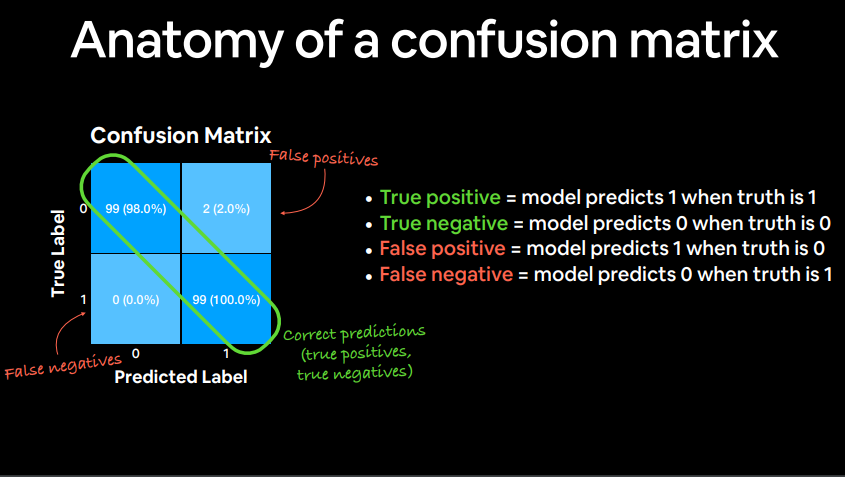

In [90]:
#lets make the confusion matrix more pretty than the output we got
from sklearn.metrics import ConfusionMatrixDisplay

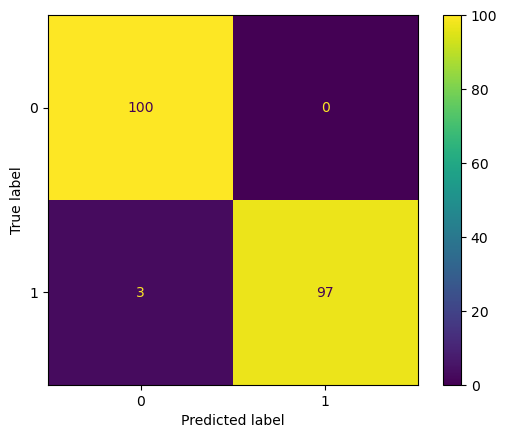

In [91]:
ConfusionMatrixDisplay(confusion_matrix(y_test, preds10)).plot()


### putting it all together with a multi-class classification problem


working with image data from the fmnist dataset (shoe vs shirt vs jacket)

In [95]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, ConfusionMatrixDisplay

In [96]:
#lets get the dataset ready
#the data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [101]:
#show the first training example
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [105]:
#check the shape of the single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

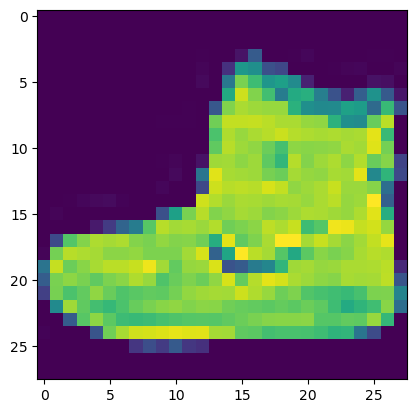

In [106]:
#plot the single example
plt.imshow(train_data[0])

In [107]:
#create a small list so we can index onto our traning labels so they're human readable
class_names = ["T-shirt", 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

Text(0.5, 1.0, 'Bag')

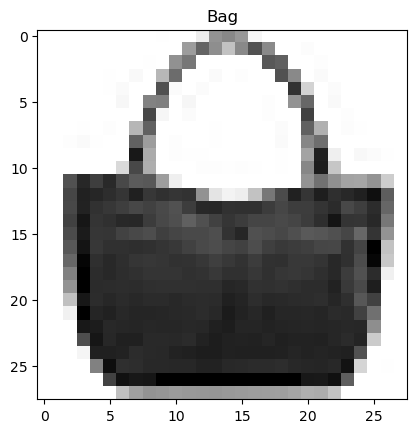

In [111]:
#plot an example image and it's label
idx = 100
plt.imshow(train_data[idx], cmap = plt.cm.binary)
plt.title(class_names[train_labels[idx]])

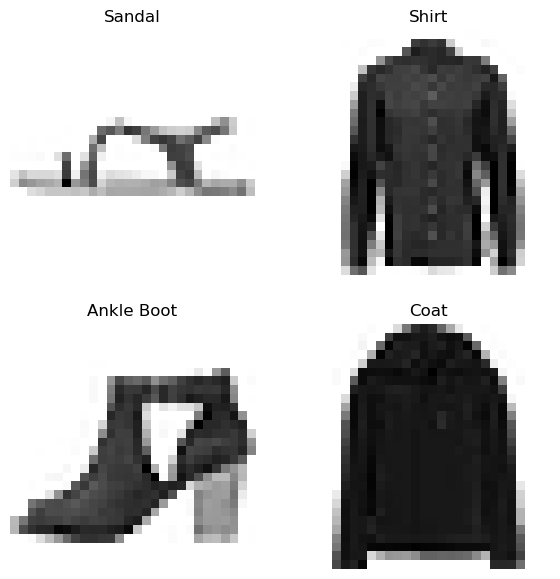

In [124]:
#plot multiple random images from fashion mnist
import random
plt.figure(figsize = (7,7))
for i in range(4):
    ax = plt.subplot(2,2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

for our multiclass model we can use a similar architecture to our binary classifiers but we're
going to have to tweak a few things

* input shape = 28x28 (the shape of 1 image)
* output shape = 10 (1 per class)
* loss function = tf.keras.losses.CategoricalCrossentropy()
    * if labels are one hot encoded use categoricalcrossentropy
    * if labels are single column use sparsecategoricalcrossentropy
* output activation = softmax

In [133]:
#CategoricalCrossentropy() takes in a one hot encoded matrix of labels.
#if we have a single column of labels (like we do in this case) we actually need to use 
#sparsecatrogicalcrossentropy()

In [160]:
#build a multi-class model

tf.random.set_seed(42)

model11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

non_norm_history = model11.fit(train_data, 
            tf.one_hot(train_labels, depth = 10), 
            epochs = 10, 
            validation_data = (test_data, tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8671 - accuracy: 0.2832 - val_loss: 1.6751 - val_accuracy: 0.3228
Epoch 2/10
1875/1875 [==============================] - 2s 923us/step - loss: 1.6336 - accuracy: 0.3514 - val_loss: 1.5761 - val_accuracy: 0.3525
Epoch 3/10
1875/1875 [==============================] - 2s 925us/step - loss: 1.5437 - accuracy: 0.3772 - val_loss: 1.5187 - val_accuracy: 0.3802
Epoch 4/10
1875/1875 [==============================] - 2s 919us/step - loss: 1.5339 - accuracy: 0.3683 - val_loss: 1.5360 - val_accuracy: 0.3703
Epoch 5/10
1875/1875 [==============================] - 2s 921us/step - loss: 1.5404 - accuracy: 0.3582 - val_loss: 1.4673 - val_accuracy: 0.4164
Epoch 6/10
1875/1875 [==============================] - 2s 920us/step - loss: 1.4336 - accuracy: 0.4053 - val_loss: 1.4812 - val_accuracy: 0.3995
Epoch 7/10
1875/1875 [==============================] - 2s 924us/step - loss: 1.4150 - accuracy: 0.3998 - val_loss: 1.4208 - v

right now we're getting about 40% accuracy which is quite a bit better than guessing (since we have 10 classes) but let's see if we can improve it

In [161]:
model11.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_94 (Dense)            (None, 4)                 3140      
                                                                 
 dense_95 (Dense)            (None, 4)                 20        
                                                                 
 dense_96 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


* let's do some preprocessing to see if we can improve the model.
* nn prefer data to be scaled (or normalized) to 0-1 rather than 0-255

In [162]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [163]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [168]:
tf.random.set_seed(42)

model12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
model12.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

norm_history = model12.fit(train_data_norm,
           tf.one_hot(train_labels, depth = 10),
           epochs = 10,
           validation_data = (test_data_norm,
                             tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 2s 990us/step - loss: 1.7064 - accuracy: 0.3398 - val_loss: 1.2759 - val_accuracy: 0.5277
Epoch 2/10
1875/1875 [==============================] - 2s 899us/step - loss: 1.1253 - accuracy: 0.5814 - val_loss: 1.0475 - val_accuracy: 0.6078
Epoch 3/10
1875/1875 [==============================] - 2s 896us/step - loss: 0.9909 - accuracy: 0.6231 - val_loss: 0.9759 - val_accuracy: 0.6358
Epoch 4/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.8569 - accuracy: 0.6985 - val_loss: 0.8138 - val_accuracy: 0.7104
Epoch 5/10
1875/1875 [==============================] - 2s 908us/step - loss: 0.7634 - accuracy: 0.7279 - val_loss: 0.7649 - val_accuracy: 0.7318
Epoch 6/10
1875/1875 [==============================] - 2s 907us/step - loss: 0.7229 - accuracy: 0.7405 - val_loss: 0.7296 - val_accuracy: 0.7365
Epoch 7/10
1875/1875 [==============================] - 2s 904us/step - loss: 0.6938 - accuracy: 0.7577 - val_loss: 0.7122 -

now the accuracy of the train data is 80% and the accuracy of the validation data is 67%. quite the improvement

In [167]:
tf.random.set_seed(42)

model12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
model12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

model12.fit(train_data_norm,
           train_labels,
           epochs = 10,
           validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 990us/step - loss: 1.2236 - accuracy: 0.5624 - val_loss: 157.9915 - val_accuracy: 0.5131
Epoch 2/10
1875/1875 [==============================] - 2s 910us/step - loss: 0.7532 - accuracy: 0.7387 - val_loss: 160.3482 - val_accuracy: 0.5206
Epoch 3/10
1875/1875 [==============================] - 2s 906us/step - loss: 0.6846 - accuracy: 0.7576 - val_loss: 171.4485 - val_accuracy: 0.5912
Epoch 4/10
1875/1875 [==============================] - 2s 906us/step - loss: 0.6593 - accuracy: 0.7613 - val_loss: 211.7573 - val_accuracy: 0.5677
Epoch 5/10
1875/1875 [==============================] - 2s 900us/step - loss: 0.6448 - accuracy: 0.7650 - val_loss: 229.3735 - val_accuracy: 0.5667
Epoch 6/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.6344 - accuracy: 0.7677 - val_loss: 205.9022 - val_accuracy: 0.5635
Epoch 7/10
1875/1875 [==============================] - 2s 906us/step - loss: 0.6263 - accuracy: 0.7702 - val_lo

comparing the history of normalized and non-normalized model

<Axes: title={'center': 'normalized data'}>

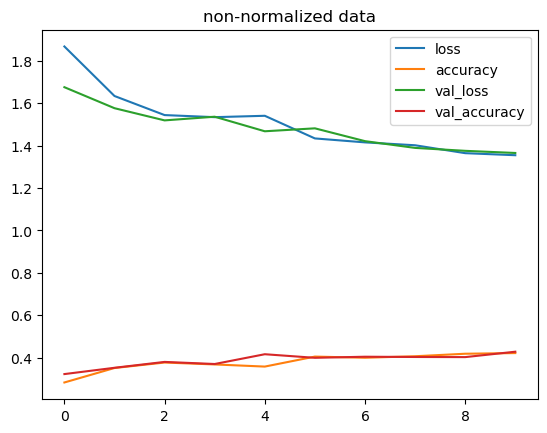

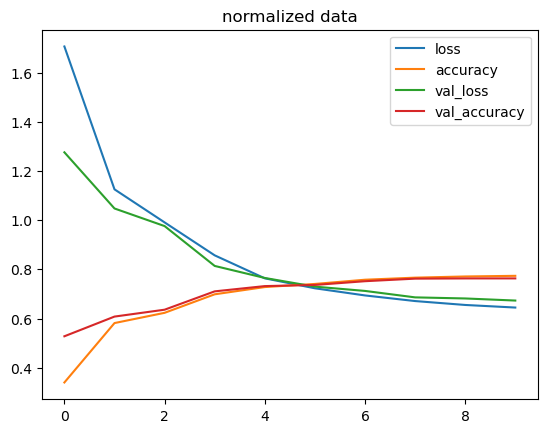

In [169]:

pd.DataFrame(non_norm_history.history).plot(title = 'non-normalized data')
pd.DataFrame(norm_history.history).plot(title = 'normalized data')

finding the ideal learning rate (i.e. where the loss is decreasing the most)

In [173]:
tf.random.set_seed(42)
model13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

#create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * (10**(epoch/20)))

find_lr_history = model13.fit(
    train_data_norm,
    train_labels,
    epochs = 40,
    validation_data = (test_data_norm, test_labels),
    callbacks = [lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5294 - accuracy: 0.4585 - val_loss: 1.2375 - val_accuracy: 0.5817 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 917us/step - loss: 1.0988 - accuracy: 0.6247 - val_loss: 1.0186 - val_accuracy: 0.6554 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 913us/step - loss: 0.8981 - accuracy: 0.6887 - val_loss: 0.8571 - val_accuracy: 0.6939 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 922us/step - loss: 0.7992 - accuracy: 0.7202 - val_loss: 0.8051 - val_accuracy: 0.7187 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 906us/step - loss: 0.7451 - accuracy: 0.7432 - val_loss: 0.7483 - val_accuracy: 0.7480 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 910us/step - loss: 0.6924 - accuracy: 0.7607 - val_loss: 0.7141 - val_accuracy: 0.7532 - lr: 0.0018
Epoch 7/40
1875/1875 [==========================

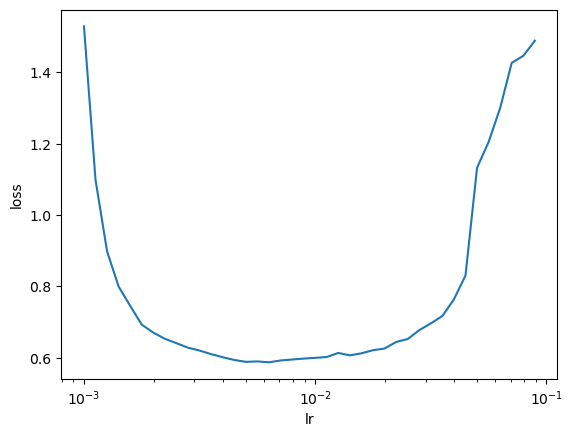

In [174]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('lr')
plt.ylabel('loss')
plt.title = 'find optimal lr'

In [180]:
#looks liek 10**-3 (.001) actually has the best lr so the default param worked the best.
#so lets create a model with the ideal lr

tf.random.set_seed(42)
model14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
               metrics = ['accuracy'])

history14 = model14.fit(train_data_norm, 
                        train_labels, 
                        epochs = 20, 
                        validation_data = (test_data_norm, test_labels)
                       )

Epoch 1/20
1875/1875 [==============================] - 2s 988us/step - loss: 1.3503 - accuracy: 0.4947 - val_loss: 0.9830 - val_accuracy: 0.6250
Epoch 2/20
1875/1875 [==============================] - 2s 901us/step - loss: 0.8943 - accuracy: 0.6603 - val_loss: 0.8379 - val_accuracy: 0.7068
Epoch 3/20
1875/1875 [==============================] - 2s 907us/step - loss: 0.7242 - accuracy: 0.7551 - val_loss: 0.6979 - val_accuracy: 0.7642
Epoch 4/20
1875/1875 [==============================] - 2s 902us/step - loss: 0.6423 - accuracy: 0.7846 - val_loss: 0.6483 - val_accuracy: 0.7784
Epoch 5/20
1875/1875 [==============================] - 2s 904us/step - loss: 0.6137 - accuracy: 0.7877 - val_loss: 0.6331 - val_accuracy: 0.7793
Epoch 6/20
1875/1875 [==============================] - 2s 902us/step - loss: 0.5977 - accuracy: 0.7900 - val_loss: 0.6153 - val_accuracy: 0.7831
Epoch 7/20
1875/1875 [==============================] - 2s 902us/step - loss: 0.5898 - accuracy: 0.7927 - val_loss: 0.6494 -

#### evaluating the model

<Axes: >

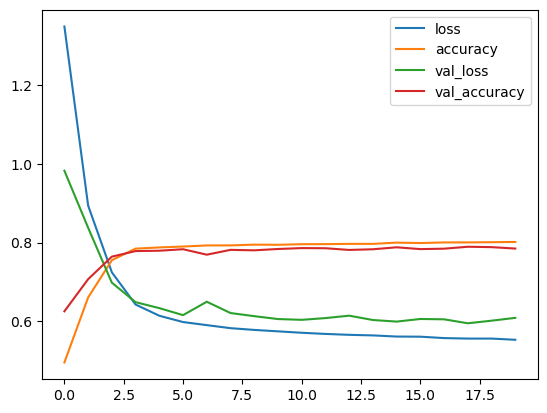

In [181]:
pd.DataFrame(history14.history).plot()

In [195]:
preds14 = tf.math.argmax(model14.predict(test_data_norm), axis = 1)

313/313 [==============================] - 0s 571us/step


In [200]:
preds14 #this returns the class number of the highest prob for each row

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 0, 1, 5], dtype=int64)>

(<matplotlib.image.AxesImage at 0x1af1dd302e0>, 'Sneaker')

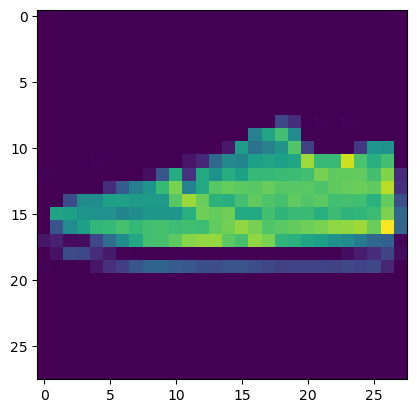

In [202]:
random_idx = 60
plt.imshow(test_data_norm[random_idx]), class_names[preds14[random_idx]]

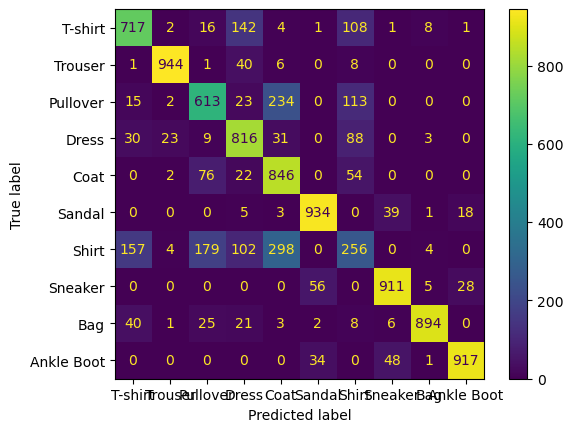

In [213]:
#create a confusion matrix
ConfusionMatrixDisplay(confusion_matrix(test_labels, preds14), display_labels = class_names).plot()


looks like class 6 (shirt) is doing a pretty bad job.
we can actually see that the shirts are getting predicted as coats, dresses, pullovers, and tshirts 
quite a bit and that tshirts, pullovers, dresses, and coats are often getting predicted as shirts.

In [203]:
accuracy_score(test_labels, preds14)

0.7848

visualizing random model predictions

In [319]:
#fun little function for a random image, plot the image, make a prediction on that image, label the plot

import random

def plot_random_image(model, images, true_labels, classes):
    '''
    picks random image, plots it, labels it with a prediction and truth.
    '''
    #setup random int
    i = random.randint(0, len(images))
    print(i)
    #create predictions and targets
    target = images[i]
    pred_prob = model.predict(target)
    pred_label = tf.math.argmax(pred_prob, axis = 1)
    true_label = true_labels[i]
    #plot the image
    plt.imshow(target, cmap = plt.cm.binary)
    if np.array(pred_label[0]) == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'pred: {classes[np.array(pred_label)[0]]} {tf.round((100 * tf.reduce_max(pred_prob)))}, true: {classes[true_label]}', color = color)

21805
1/1 [==============================] - 0s 12ms/step


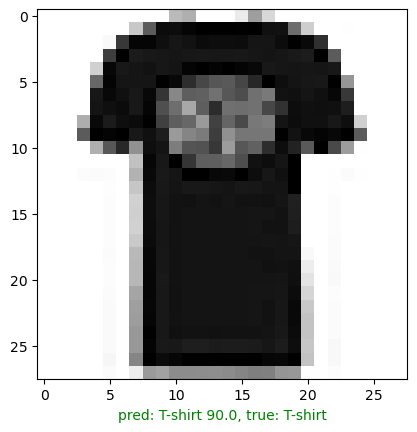

In [331]:
plot_random_image(model14, train_data_norm, train_labels, class_names)

#### what patterns is our model learning?

In [345]:
model14.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_118 (Dense)           (None, 4)                 3140      
                                                                 
 dense_119 (Dense)           (None, 4)                 20        
                                                                 
 dense_120 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [332]:
model14.layers

In [333]:
#extract a particular layer
model14.layers[1]

In [343]:
#we can get the weights of a specific layer
weights, biases = model14.layers[1].get_weights()
print(weights, weights.shape)
print(biases)

[[ 0.19026741  0.03639167 -0.2056369   0.481763  ]
 [ 0.40095565  0.24522266  0.28407797  0.62784344]
 [ 0.5920472   0.15984167 -1.0146744   1.3190496 ]
 ...
 [-0.04218164  0.3879445   0.09879883  0.22482157]
 [ 0.7358867   0.28307542  0.44199023 -0.894045  ]
 [-0.2571221   0.09409881 -0.2293509  -0.55594426]] (784, 4)
[0.5717163 1.5244472 0.5317803 2.5758073]


for each pixel of our image (784 of them) there is an associated weights array with 4 values (one for each neuron of the hidden layer). 

every neuron has a bias vector. each of these is paired with a weights matrix.
the bias vector gets initialized as zeros (at least in the case of a tf dense layer)
the bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.